In [68]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection

import time
from IPython import display

mnist = tf.keras.datasets.mnist

plt.rcParams['figure.figsize'] = 12, 9

# Plan de Classification
[x] Intro Classification

[x] Perceptron

[ ] Multilayer

[ ] Other models (SVM, Bayesian...)


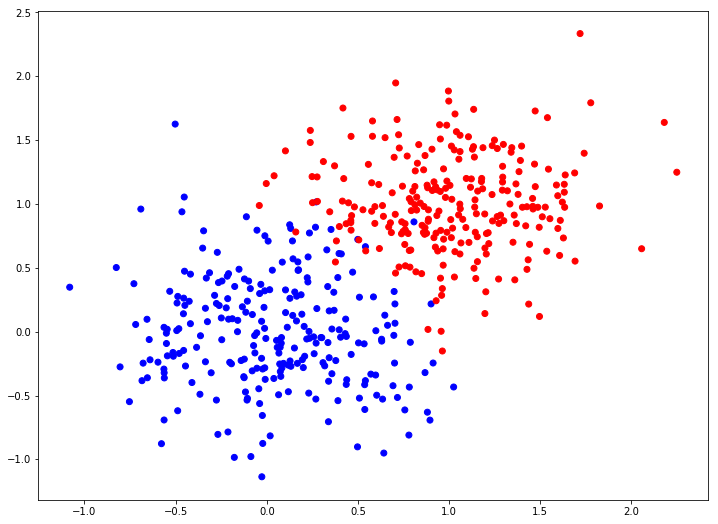

In [95]:
# Creating some toy data

centroids = np.array([[0, 0], [1, 1]])
labels = np.array([0, 1])
x = []
y = []

n = 500

for p, l in zip(centroids, labels):
    x.extend( np.concatenate((np.random.normal(p[0], 0.4, n//2), 
                              np.random.normal(p[1], 0.4, n//2))).reshape(2, n//2).T)
    y.extend([l] * (n//2))
    
x = np.array(x)
y = np.array(y)
colours = ['b' if l==0 else 'r' for l in y]
plt.scatter(x[..., 0], x[..., 1], c=colours)
plt.show()

## Perceptron

Modèle très simple en 2 dimensions :
![title](img/perceptron.png)

* $x_1$ et $x_2$ les coordonnées d'un point
* $w_1$, $w_2$ et $b$ les paramètres du modèle
* $f$ est la fonction heaviside ($0$ si $x < 0$, $1$ sinon)
* $y$ est la sortie du modèle pour l'entrée $\textbf{x}$

Une prédiction est donnée par l'équatioin suivante:
$$
y = f(\sum_i w_i \cdot x_i + b)
$$

On utilise l'équation d'apprentissage suivante :
$$
\theta^{n+1} = \theta^n - \eta\nabla_\theta E(y, t)
$$

Où $E$ désigne l'erreur commise par le modèle :
$$
E(y, t) = \frac{1}{2}(y - t)^2
$$

L'équation d'apprentissage provient de la descente de gradient : pour minimiser l'erreur on suit l'opposé de la «direction» donnée par le gradient de l'erreur par rapport aux paramètres du modèle.
Exemple : 
$$
\frac{\partial E}{\partial w_1} = \frac{\partial E}{\partial y} \frac{\partial y}{\partial w_1}
$$
$$
\frac{\partial E}{\partial w_1} = (y-t) \times x_1
$$


In [91]:
# Perceptron
"""
Ici on va tout coder de bout en bout pour un modèle simple.
"""
W = np.random.normal(0, 1, (2,))
b = np.zeros(1)

def reset_weights():
    W = np.random.normal(0, 1, (2,))
    b = np.zeros(1)

def haversine(z):
    return np.where(z >= 0, 1, 0)

def predict_class(X):
    return haversine(W.dot(X) + b)

def gradient(X, t):
    """Should return """
    pred = predict_class(X)
    return (pred - t) * X, pred - t 



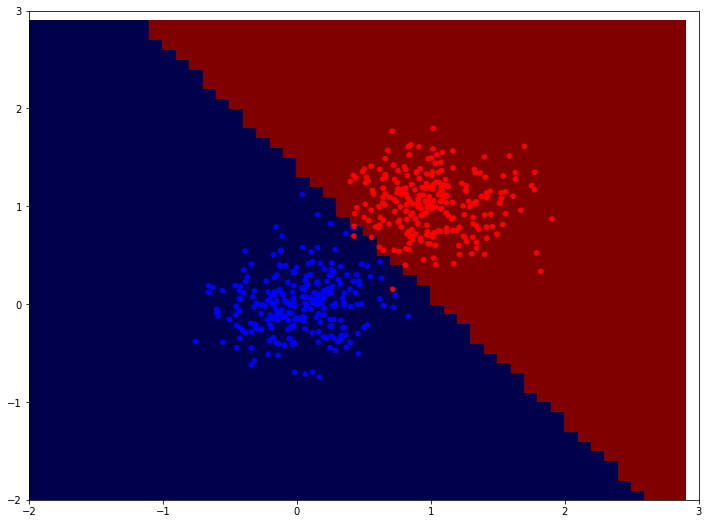

In [84]:
def plot_discriminator(W, b):
    """ 
    Plot a weight vector w = [w_0,w_1,w_2] as a colour map
    """
    
    xx,yy = np.mgrid[-2:3:.1,-2:3:0.1]

    p = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            p[i,j] = predict_class([xx[i,j], yy[i,j]])
    plt.pcolor(xx,yy,p,cmap='seismic')
    plt.xlim([-2, 3])
    plt.ylim([-2, 3])    
    plt.scatter(x[..., 0], x[..., 1], 20, colours)
    plt.show()
    
plot_discriminator(W, b)

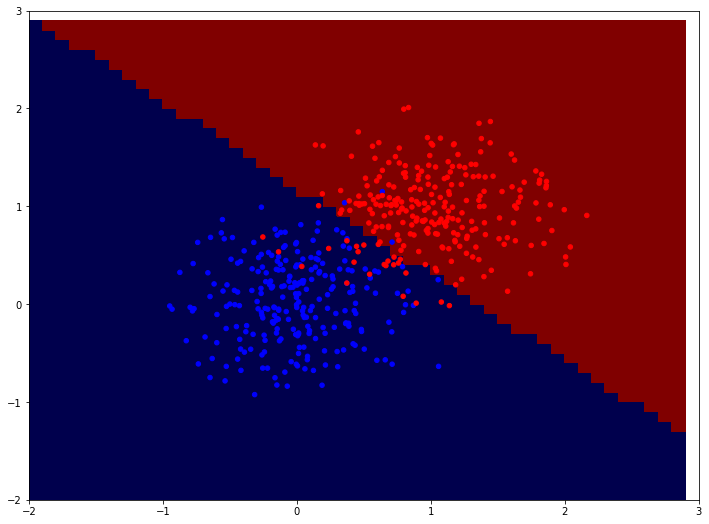

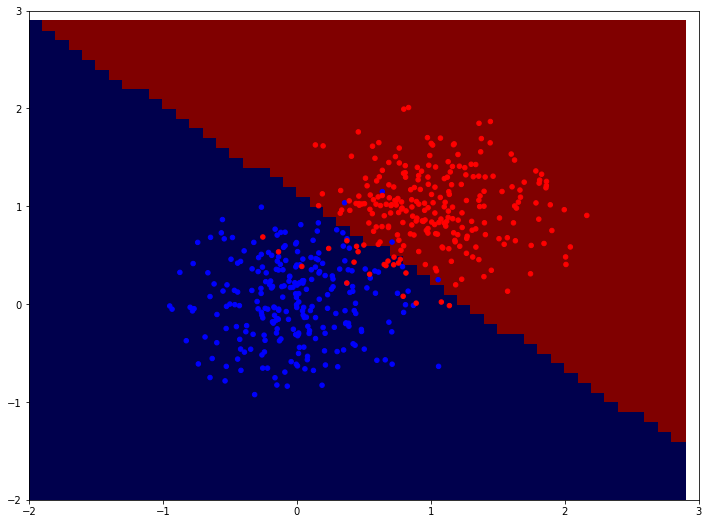

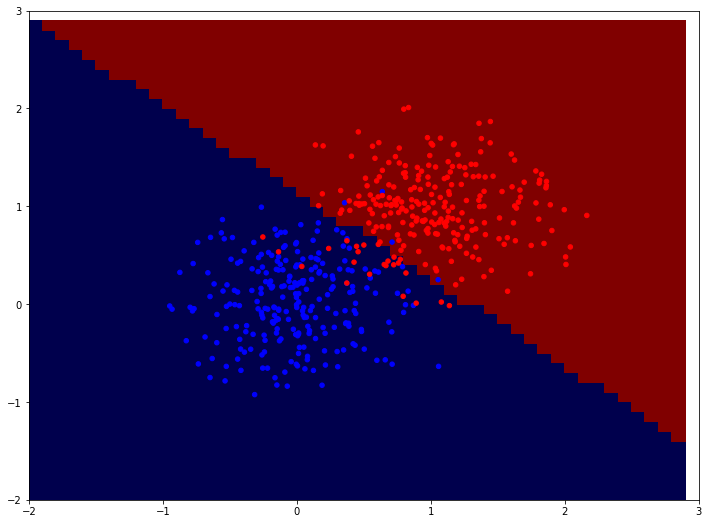

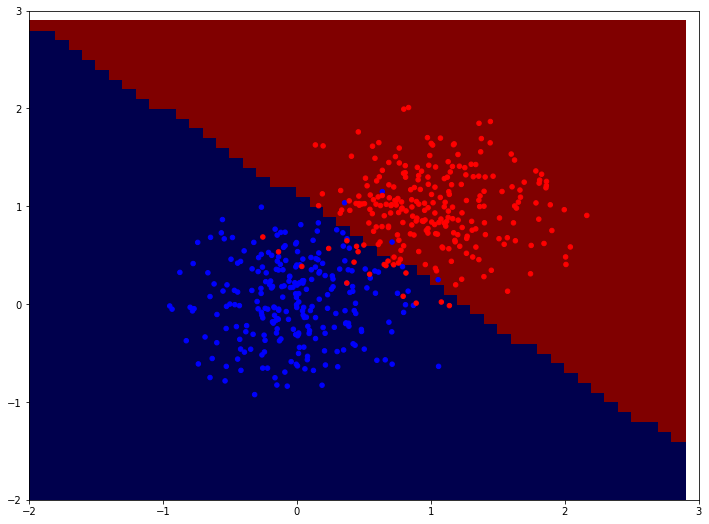

Epoch 0, accuracy=0.95


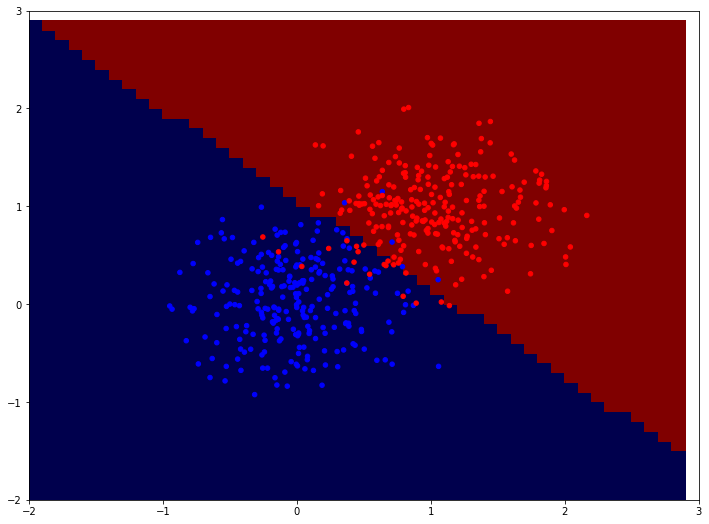

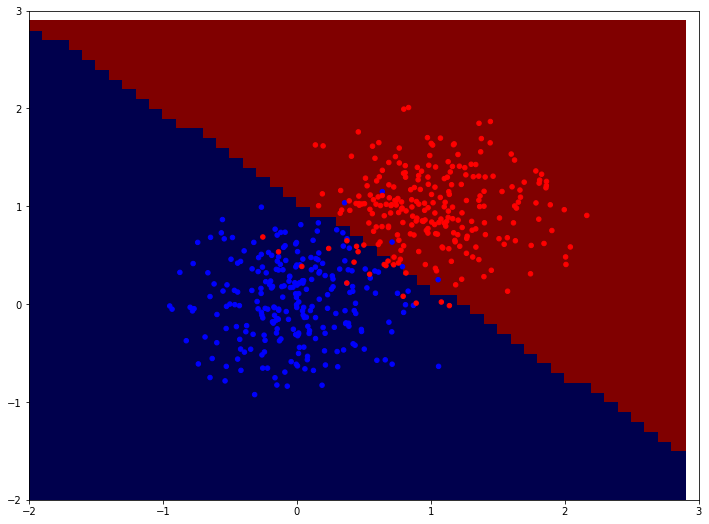

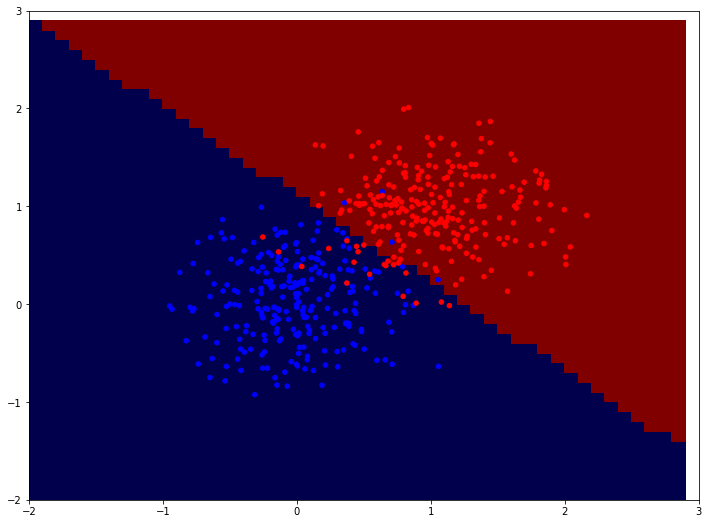

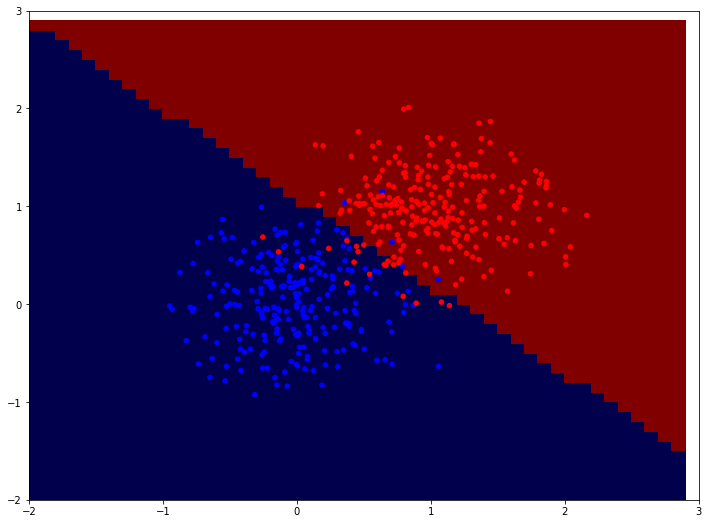

Epoch 1, accuracy=0.9575


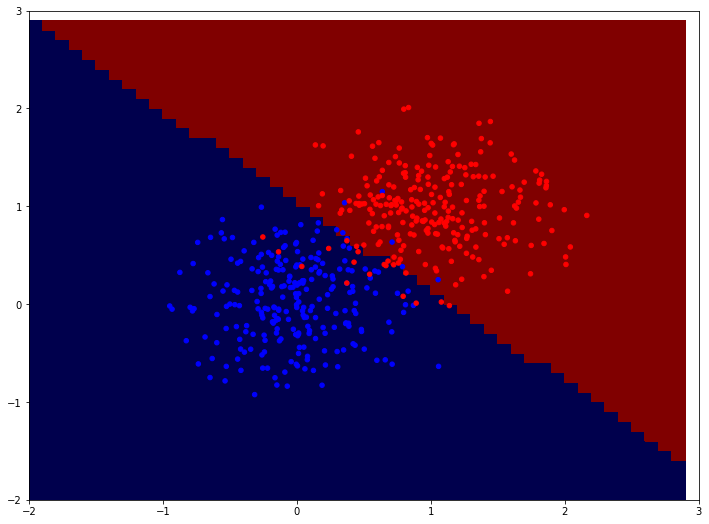

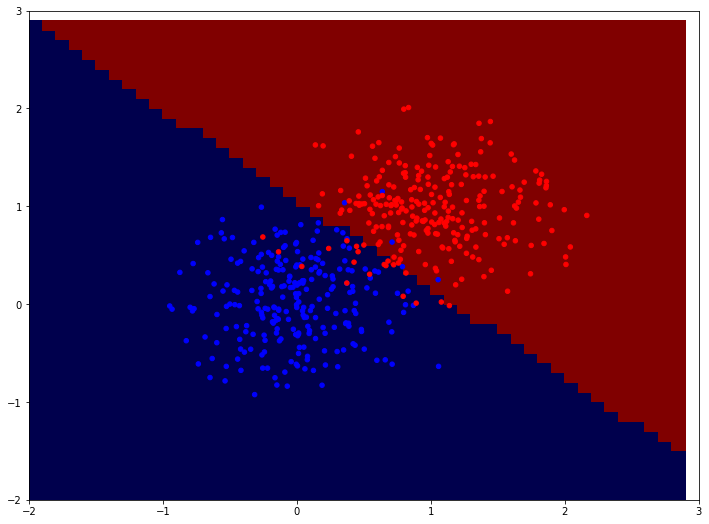

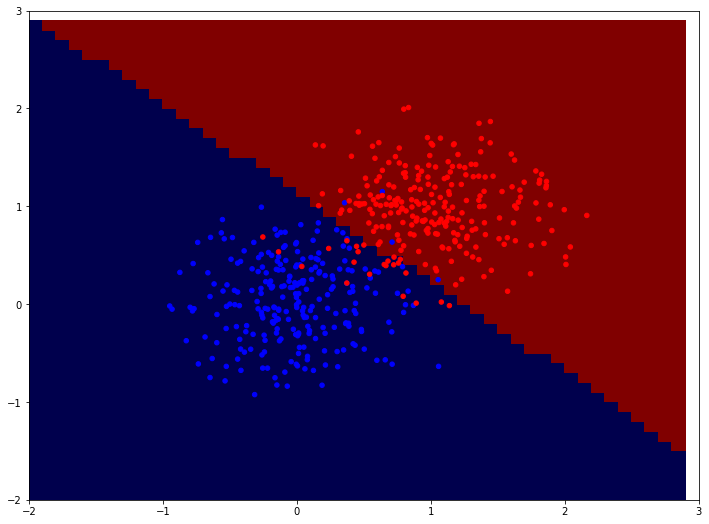

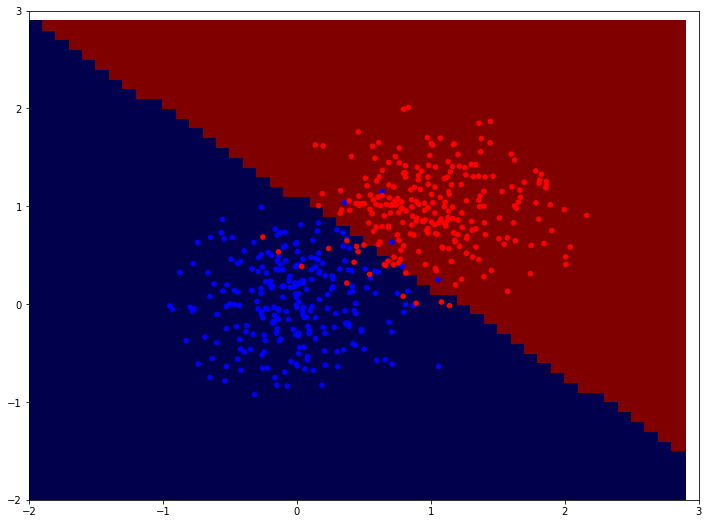

Epoch 2, accuracy=0.9625


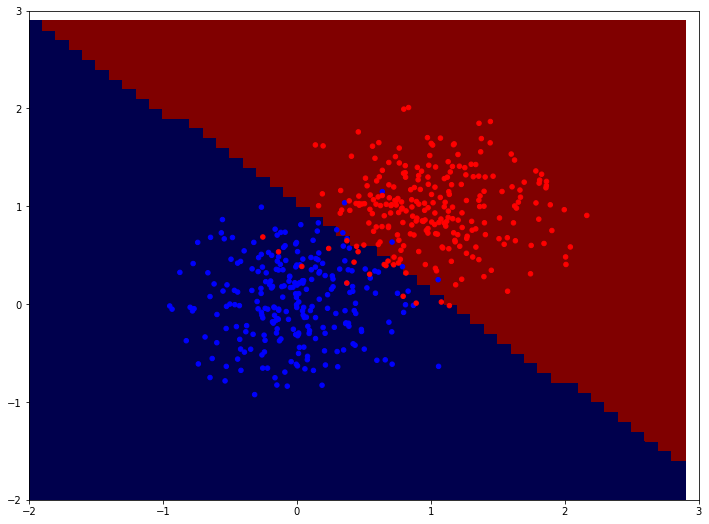

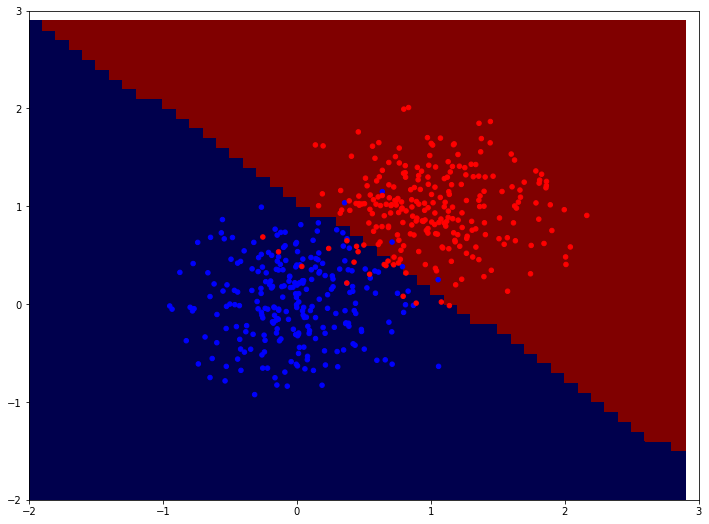

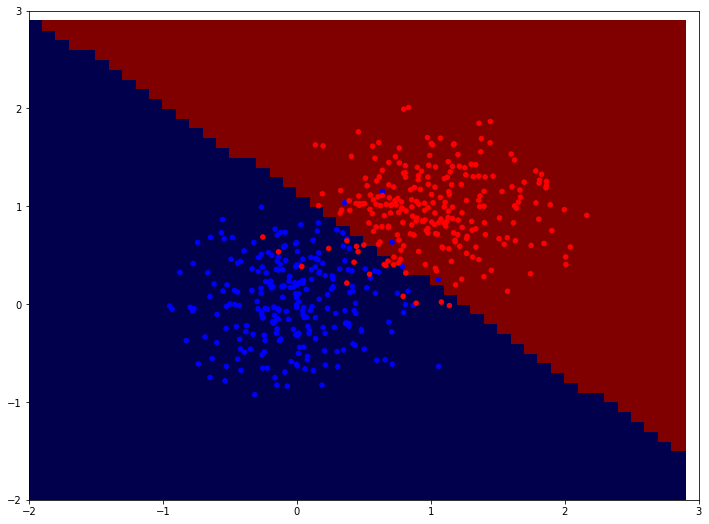

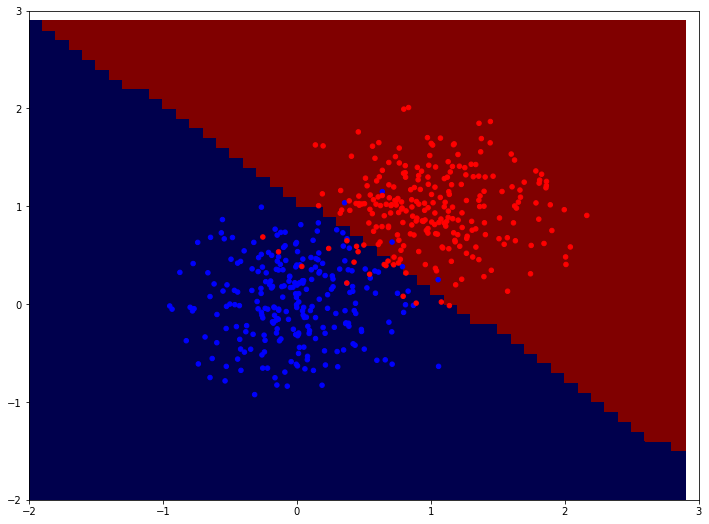

Epoch 3, accuracy=0.96


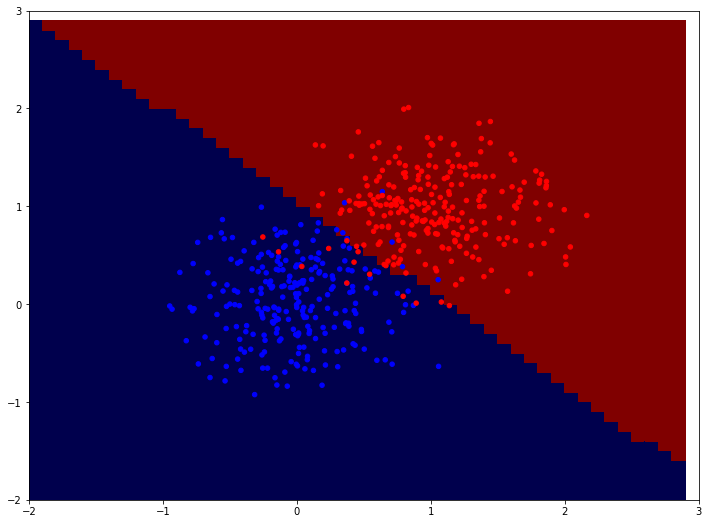

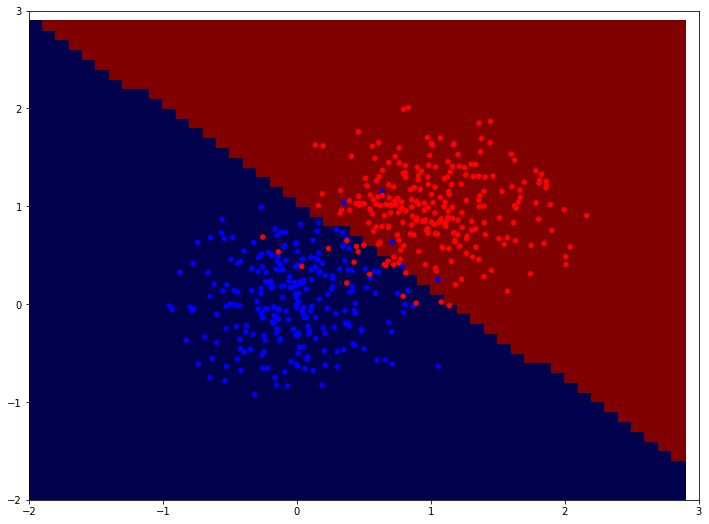

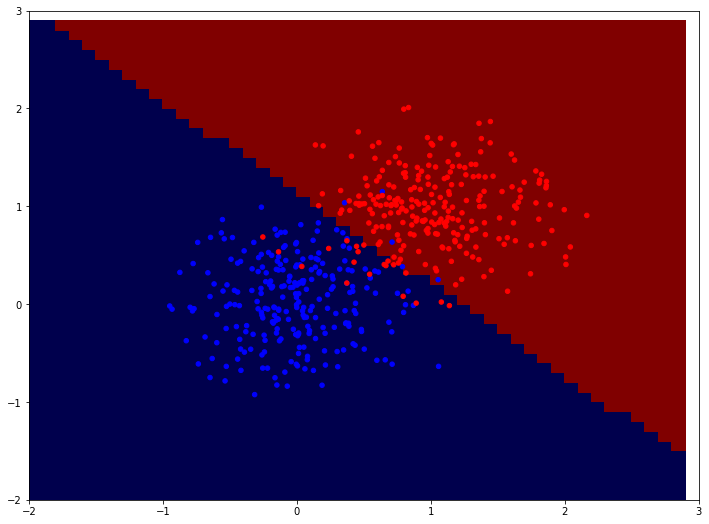

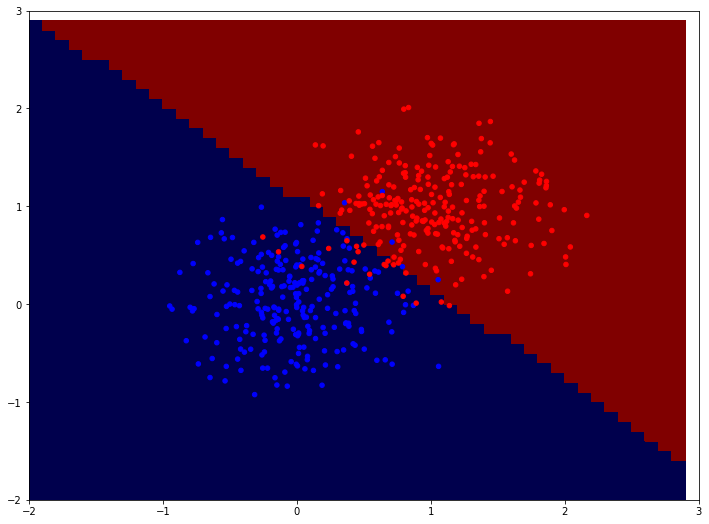

Epoch 4, accuracy=0.9625


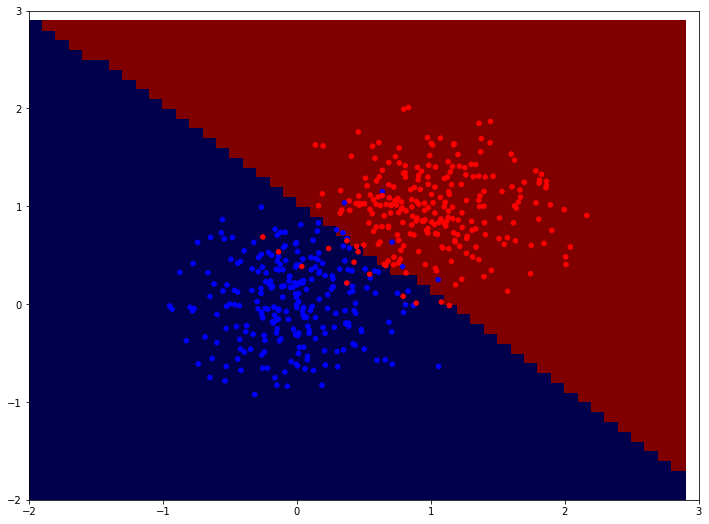

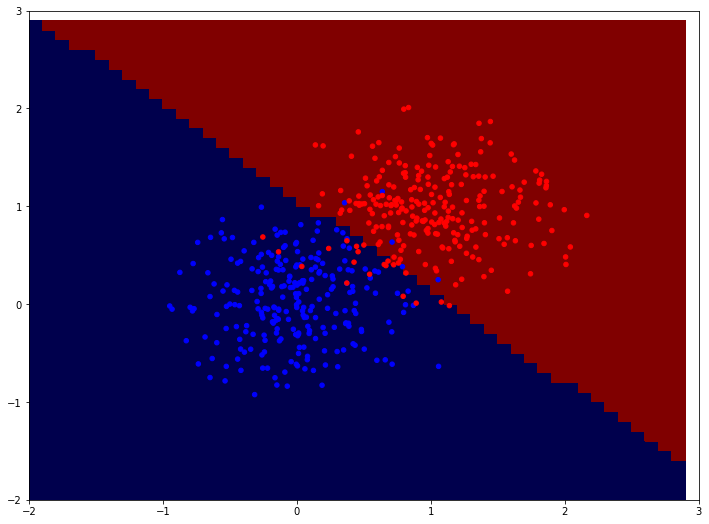

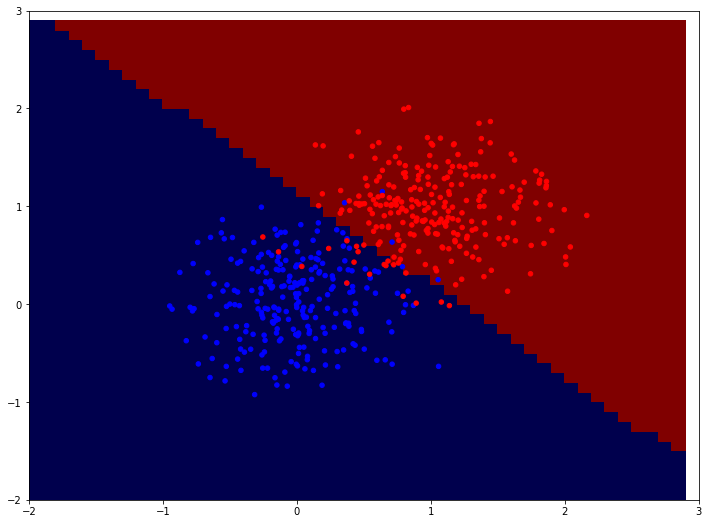

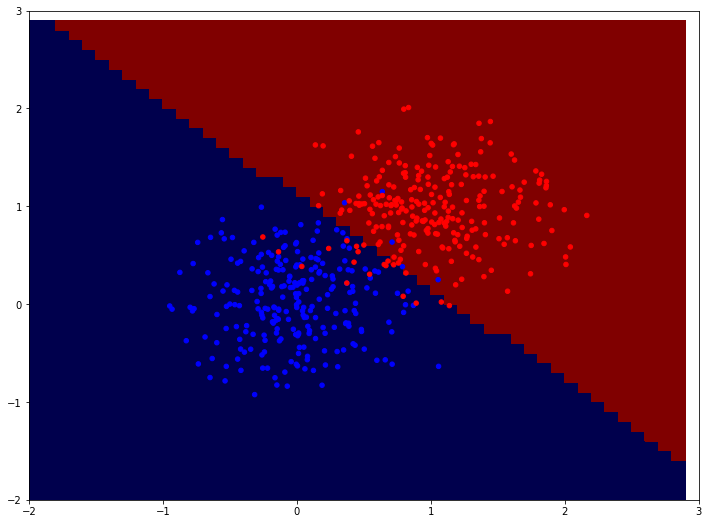

Epoch 5, accuracy=0.9625


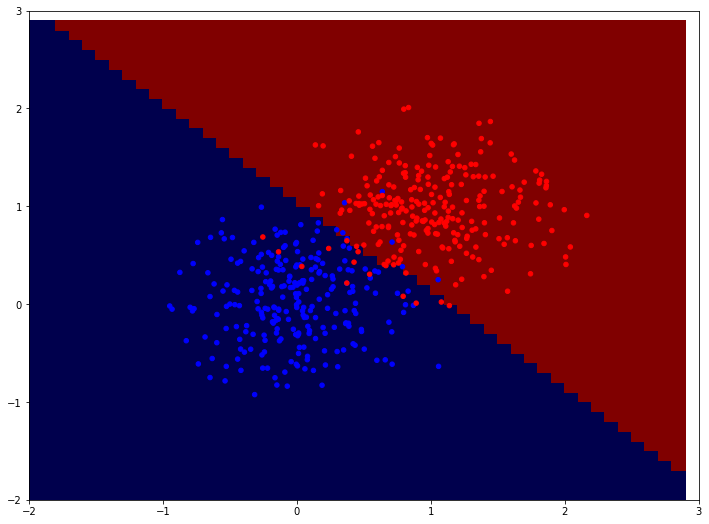

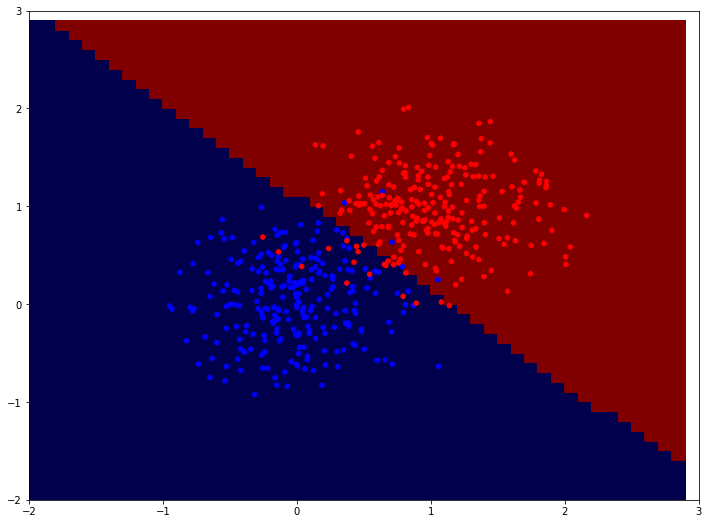

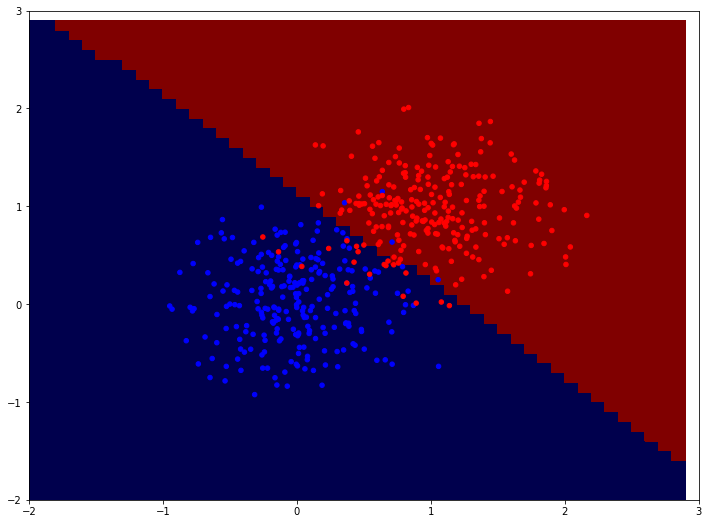

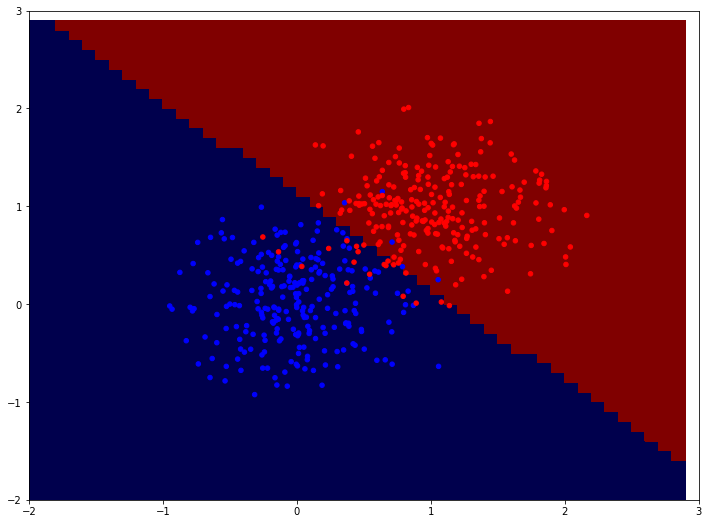

Epoch 6, accuracy=0.9625


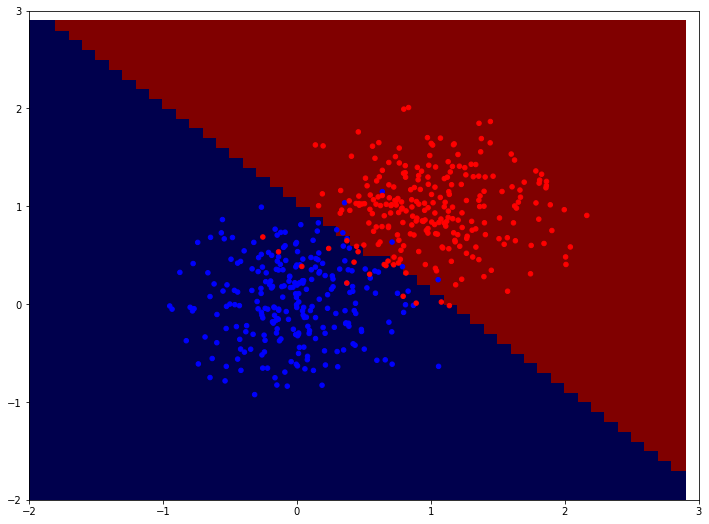

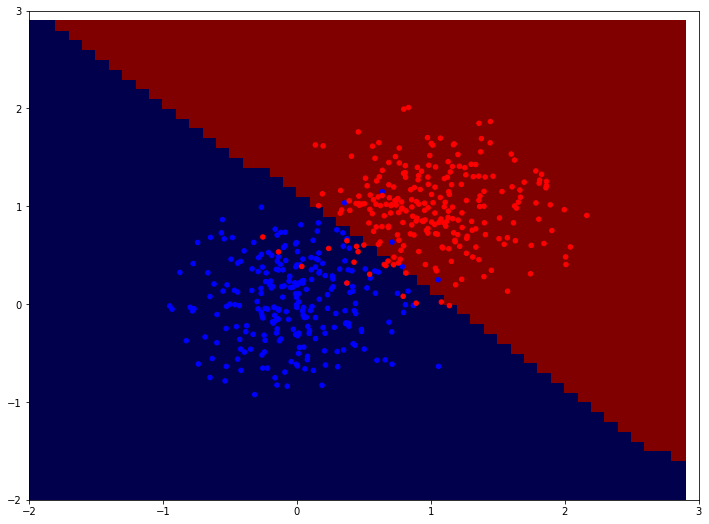

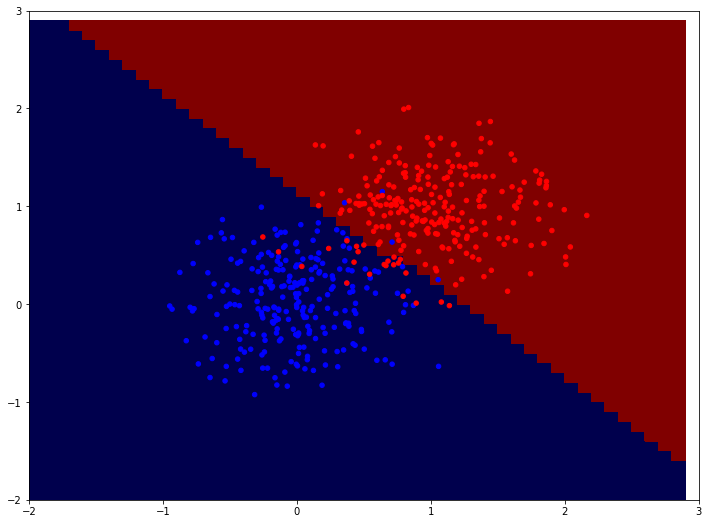

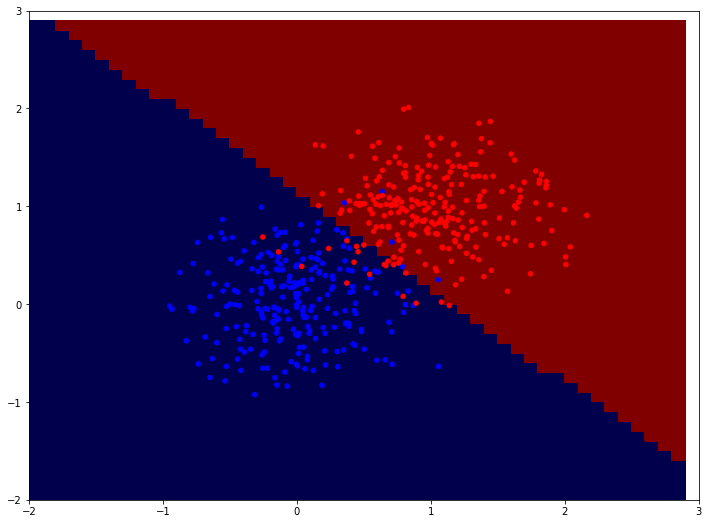

Epoch 7, accuracy=0.9625


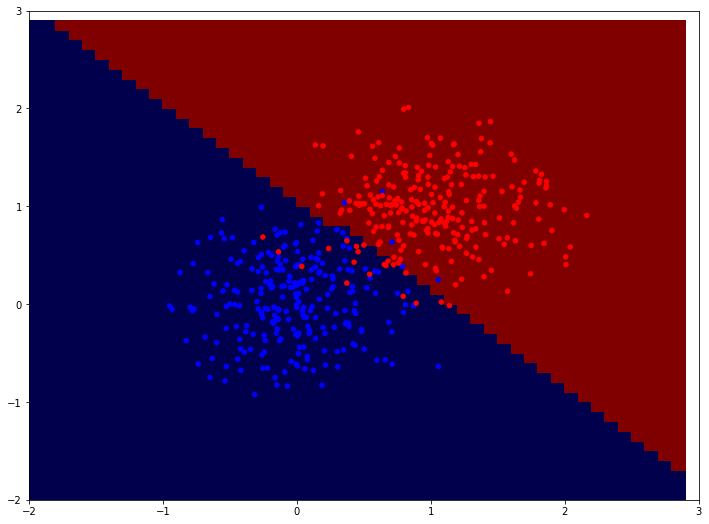

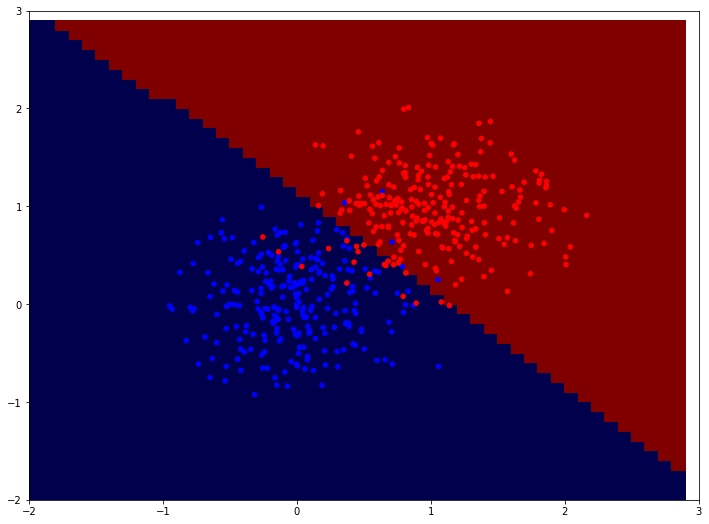

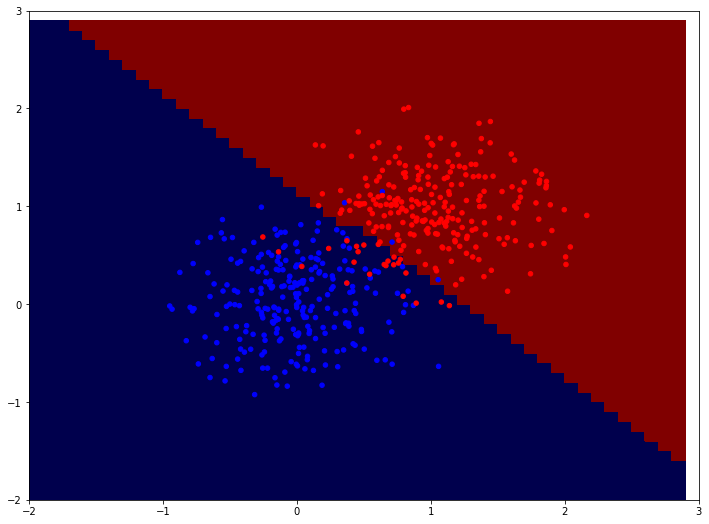

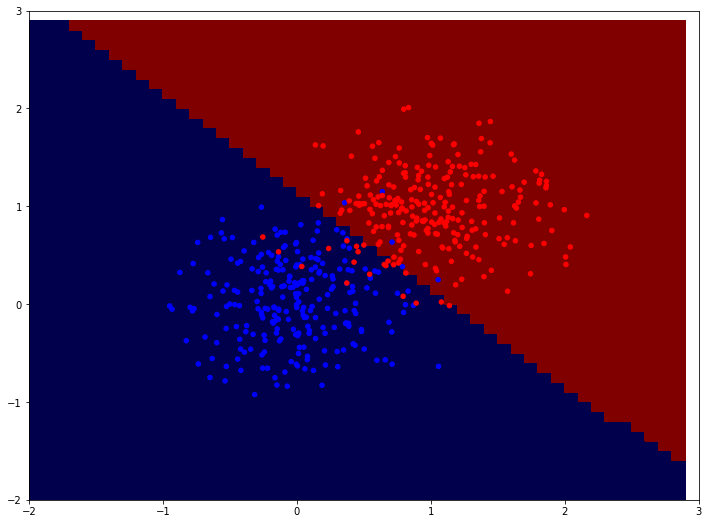

Epoch 8, accuracy=0.9625


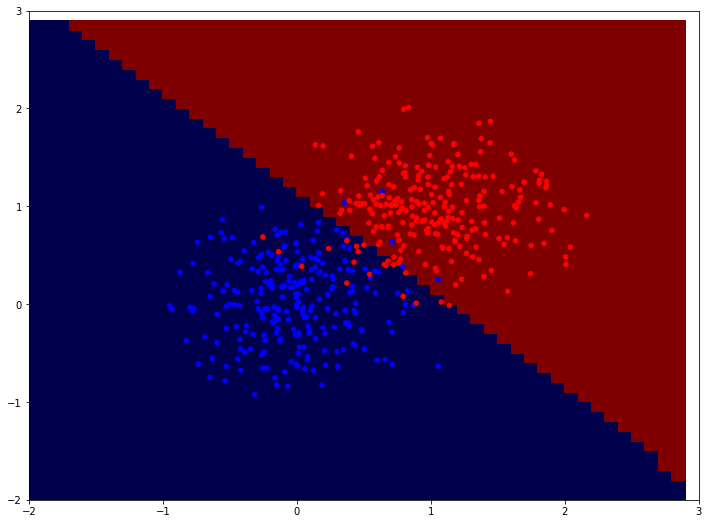

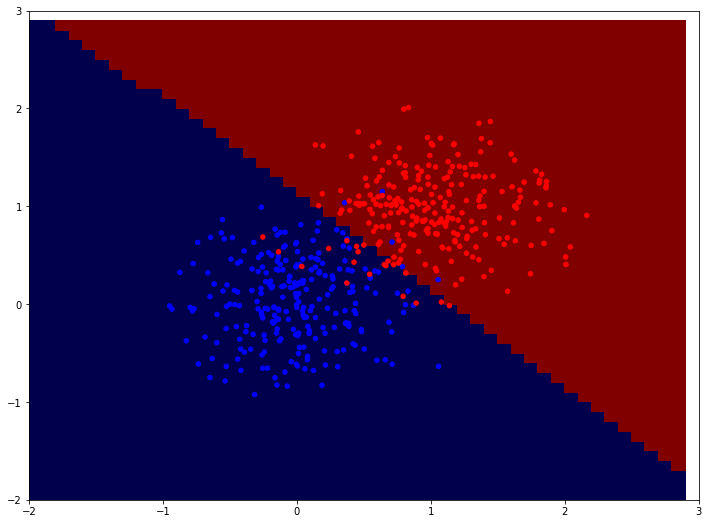

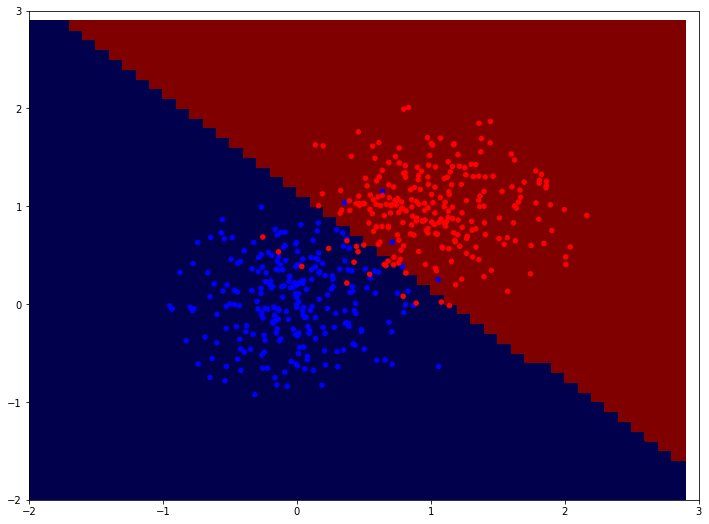

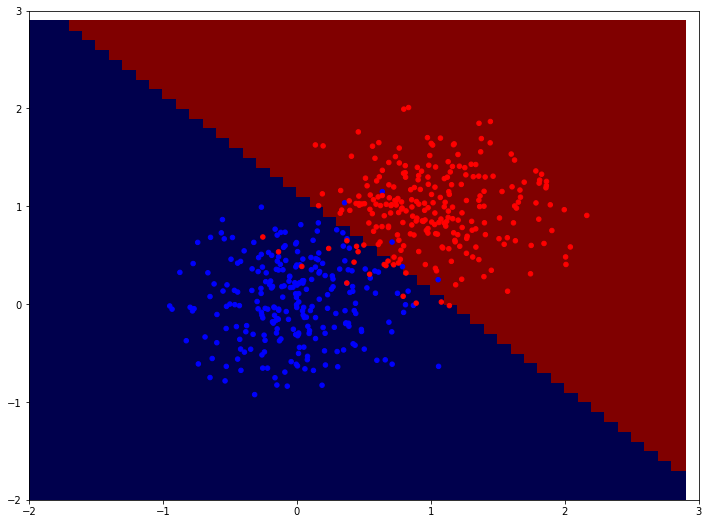

Epoch 9, accuracy=0.96


In [94]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)
learning_rate = 0.01
plotme = True

reset_weights()

for e in range(10):
    count = 0
    TP, tot = 0, 0
    for xt, yt in zip(x_train, y_train):
        
        if predict_class(xt) != yt:
            # update the model !
            dw, db = gradient(xt, yt)
            W -= learning_rate * dw
            b -= learning_rate * db
        else:
            TP += 1
        tot += 1
        
        if plotme and count % 100==0:
            plot_discriminator(W, b)
        count += 1
    print(f"Epoch {e}, accuracy={TP/tot}")


In [11]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255., x_test / 255.

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 13s 224us/step - loss: 0.2205 - acc: 0.9340
Epoch 2/5
60000/60000 [==============================] - 13s 210us/step - loss: 0.0975 - acc: 0.9706
Epoch 3/5
60000/60000 [==============================] - 14s 226us/step - loss: 0.0693 - acc: 0.9786
Epoch 4/5
60000/60000 [==============================] - 14s 226us/step - loss: 0.0530 - acc: 0.9825
Epoch 5/5
10000/10000 [==============================] - 2s 171us/step


[0.06619428644063882, 0.9802]